# Ensemble Methods Exercise

Import the file `planes.csv` from the data folder as a pandas DataFrame called `data`. 

The dataset has information about different types of airplanes, including the number of tails, year of production, type, manufacturer, model, number of engines, seat, speed, and engine type. 

In this exercise, we are going to train a classifier to predict the engine type based on the provided information.

In [ ]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/planes.csv')
data.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


## Exploratory Data Analysis 

Perform a brief Exploratory Data Analysis. Display summary statistics, handle missing values (if the number of missing values is less than 100 remove those rows, and if it is greater than 1,000 remove those columns), if needed remove unnecessary columns, check the data distribution, and report if there are correlated features.

In [ ]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3318 entries, 0 to 3317
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tailnum       3318 non-null   object 
 1   year          3249 non-null   float64
 2   type          3318 non-null   object 
 3   manufacturer  3318 non-null   object 
 4   model         3318 non-null   object 
 5   engines       3318 non-null   int64  
 6   seats         3318 non-null   int64  
 7   speed         21 non-null     float64
 8   engine        3318 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 233.4+ KB


In [4]:
data.describe()

,year,engines,seats,speed
count,3249.000000,3318.000000,3318.000000,21.000000
mean,2000.510926,1.995781,154.494876,244.571429
std,7.141253,0.115096,73.519481,154.004406
min,1956.000000,1.000000,2.000000,90.000000
25%,1997.000000,2.000000,140.000000,107.000000
50%,2001.000000,2.000000,149.000000,162.000000
75%,2005.000000,2.000000,182.000000,432.000000
max,2013.000000,4.000000,450.000000,432.000000


The column "year" has 69 missing values, we can remove the rows with missing values in "year" column; The column "speed" only has 21 non-null value, so we can delete the column.

In [5]:
# remove the column which has more than 1000 missing values
data.drop(['speed'], axis = 1, inplace = True)

In [6]:
# remove the rows which have less than 100 missing values
data.dropna(subset = ['year'], axis = 0, inplace = True)
data.shape

(3249, 8)

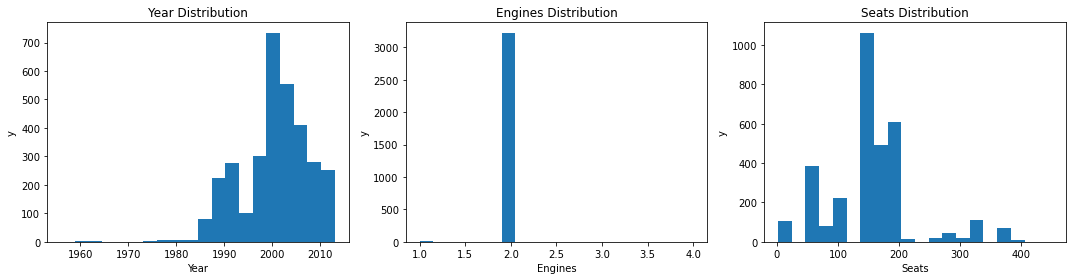

In [7]:
# check the distribution of numerical columns
plt.figure(figsize = (15,4))
plt.subplot(1,3,1)
plt.hist(data['year'],bins = 20)
plt.title('Year Distribution')
plt.xlabel('Year')
plt.ylabel("y")

plt.subplot(1,3,2)
plt.hist(data['engines'],bins = 20)
plt.title('Engines Distribution')
plt.xlabel('Engines')
plt.ylabel("y")

plt.subplot(1,3,3)
plt.hist(data['seats'],bins = 20)
plt.title('Seats Distribution')
plt.xlabel('Seats')
plt.ylabel("y")

plt.tight_layout();

In [8]:
# check value counts of object columns
object_columns = data.select_dtypes(include = 'object')
for i in object_columns:
    print ("The column %s" %(i))
    print (object_columns[i].value_counts(),'\n')

The column tailnum
N10156    1
N706SW    1
N703TW    1
N703UW    1
N704SW    1
         ..
N395DN    1
N395HA    1
N395SW    1
N396DA    1
N999DN    1
Name: tailnum, Length: 3249, dtype: int64 

The column type
Fixed wing multi engine     3228
Fixed wing single engine      16
Rotorcraft                     5
Name: type, dtype: int64 

The column manufacturer
BOEING                           1603
AIRBUS INDUSTRIE                  390
BOMBARDIER INC                    362
AIRBUS                            328
EMBRAER                           293
MCDONNELL DOUGLAS                 116
MCDONNELL DOUGLAS AIRCRAFT CO     103
MCDONNELL DOUGLAS CORPORATION      14
CANADAIR                            9
CESSNA                              8
PIPER                               5
BELL                                2
GULFSTREAM AEROSPACE                2
FRIEDEMANN JON                      1
CANADAIR LTD                        1
DEHAVILLAND                         1
MARZ BARRY                     

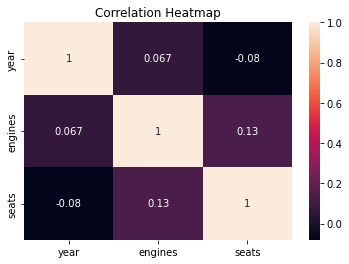

In [9]:
# chech the correlations of the columns
correlation = data.corr()
sns.heatmap(correlation, annot = True)
plt.title('Correlation Heatmap')
plt.show()

### Data Preparation

Encode the categorical features in the dataset into ordinal features using the Ordinal Encoder, use ordinal encoding with the Label Encoder for the column `engine` as target labels, and normalize the data to the range [0,1]. Display the shape of the data and target.

In [ ]:
# Ordinal Encoder for categorical columns
from sklearn.preprocessing import OrdinalEncoder
cate_columns = data[['tailnum','type','manufacturer','model']]

ordinalEncoder = OrdinalEncoder()
ordinal_cate_columns = ordinalEncoder.fit_transform(cate_columns)

ordinal_cate_columns

array([[0.000e+00, 0.000e+00, 1.400e+01, 9.900e+01],
       [1.000e+00, 0.000e+00, 2.000e+00, 8.100e+01],
       [2.000e+00, 0.000e+00, 2.000e+00, 8.100e+01],
       ...,
       [3.246e+03, 0.000e+00, 6.000e+00, 9.000e+00],
       [3.247e+03, 0.000e+00, 2.200e+01, 1.060e+02],
       [3.248e+03, 0.000e+00, 2.200e+01, 1.060e+02]])

In [13]:
data[['tailnum','type','manufacturer','model']] = pd.DataFrame(ordinal_cate_columns, 
                                                               columns = cate_columns.columns,
                                                              index = cate_columns.index)

In [14]:
# lable Encoder of Engine column
from sklearn.preprocessing import LabelEncoder
engine = data[['engine']]

labelEncoder = LabelEncoder()
label_engine = labelEncoder.fit_transform(engine)

data['engine'] = pd.DataFrame(label_engine, columns = engine.columns, index = engine.index)
data.head()

/Users/wly/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,tailnum,year,type,manufacturer,model,engines,seats,engine
0,0.0,2004.0,0.0,14.0,99.0,2,55,1
1,1.0,1998.0,0.0,2.0,81.0,2,182,1
2,2.0,1999.0,0.0,2.0,81.0,2,182,1
3,3.0,1999.0,0.0,2.0,81.0,2,182,1
4,4.0,2002.0,0.0,14.0,98.0,2,55,1


In [15]:
y = data['engine']

In [16]:
X = data.drop('engine',axis = 1 )
X

,tailnum,year,type,manufacturer,model,engines,seats
0,0.0,2004.0,0.0,14.0,99.0,2,55
1,1.0,1998.0,0.0,2.0,81.0,2,182
2,2.0,1999.0,0.0,2.0,81.0,2,182
3,3.0,1999.0,0.0,2.0,81.0,2,182
4,4.0,2002.0,0.0,14.0,98.0,2,55
...,...,...,...,...,...,...,...
3313,3244.0,2002.0,0.0,6.0,9.0,2,100
3314,3245.0,1992.0,0.0,21.0,106.0,2,142
3315,3246.0,2002.0,0.0,6.0,9.0,2,100
3316,3247.0,1992.0,0.0,22.0,106.0,2,142


In [17]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
X_normalized = minmax_scaler.fit_transform(X)

X_normalized

array([[0.00000000e+00, 8.42105263e-01, 0.00000000e+00, ...,
        8.46153846e-01, 3.33333333e-01, 1.18303571e-01],
       [3.07881773e-04, 7.36842105e-01, 0.00000000e+00, ...,
        6.92307692e-01, 3.33333333e-01, 4.01785714e-01],
       [6.15763547e-04, 7.54385965e-01, 0.00000000e+00, ...,
        6.92307692e-01, 3.33333333e-01, 4.01785714e-01],
       ...,
       [9.99384236e-01, 8.07017544e-01, 0.00000000e+00, ...,
        7.69230769e-02, 3.33333333e-01, 2.18750000e-01],
       [9.99692118e-01, 6.31578947e-01, 0.00000000e+00, ...,
        9.05982906e-01, 3.33333333e-01, 3.12500000e-01],
       [1.00000000e+00, 6.31578947e-01, 0.00000000e+00, ...,
        9.05982906e-01, 3.33333333e-01, 3.12500000e-01]])

## Voting Ensemble

Train a hard voting ensemble using k-Nearest Neighbors, SVM, and Logistic Regression, and **compare the accuracy of the ensemble to the individual classifiers**.

Differently from the examples in the lecture notes on Ensemble Methods, use a 5-fold cross-validation. Don't need to split the data into train and test sets, as this will be performed by the `cross_validate` function in scikit-learn. 

Report the mean and standard distribution of the accuracy scores for the 5-fold cross validation. 



```
import warnings
warnings.filterwarnings('ignore')
```

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
from sklearn.model_selection import cross_validate

In [ ]:
# k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_normalized, y)

result_cv_knn = cross_validate(knn, X_normalized, y, cv = 5)
score = result_cv_knn['test_score']

print('Accuracy is: {} +/- {}'.format(round(score.mean(),4),round(score.std(),4)))

Accuracy is: 0.8335 +/- 0.047


In [21]:
# SVM model
from sklearn.svm import SVC

svm_model = SVC(random_state = 1)
svm_model.fit(X_normalized, y)

result_cv_svm = cross_validate(svm_model, X_normalized, y, cv = 5)
score = result_cv_svm['test_score']

print('Accuracy is: {} +/- {}'.format(round(score.mean(),4),round(score.std(),4)))

Accuracy is: 0.8076 +/- 0.0446


In [22]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_normalized, y)

result_cv_lr = cross_validate(lr_model, X_normalized, y, cv = 5)
score = result_cv_lr['test_score']

print('Accuracy is: {} +/- {}'.format(round(score.mean(),4),round(score.std(),4)))

Accuracy is: 0.8175 +/- 0.0132


In [23]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(
                    estimators = [
                        ('knn',knn),
                        ('svm',svm_model),
                        ('lr',lr_model)],
                     voting = 'hard')

cv_result = cross_validate(voting_classifier, X_normalized, y, cv = 5)
score = cv_result['test_score']

print(f'Accuracy is: {score.mean():.3f} +/- {score.std():.3f}')

Accuracy is: 0.825 +/- 0.014


Comparing the voting ensemble model with the individual model,it is found that voting ensemble model has better performance over SVM model and Logistic Regression model, but has less accuracy than knn model.

Add SGD and Naive Bayes classifiers to the three models above, and report the results of the hard Voting Ensemble with the five individual models. Are there any improvements?

In [ ]:

from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB

sgd_model = SGDClassifier()
nb_model = GaussianNB()

voting_classifier_2 = VotingClassifier(
                        estimators = [('lr:',lr_model),
                                     ('svm:',svm_model),
                                     ('knn:',knn),
                                     ('sgd:',sgd_model),
                                     ('nb:',nb_model)],
                        voting = 'hard')
cv_result_2 = cross_validate(voting_classifier_2, X_normalized, y, cv = 5)
score_2 = cv_result['test_score']

print(f'Accuracy is: {score_2.mean():.3f} +/- {score_2.std():.3f}')

Accuracy is: 0.825 +/- 0.014


Train a soft Voting Ensemble using 3 individual models of the choices, and compare the results to the hard Voting Ensemble model. Are the results as expected?

In [ ]:

voting_classifier_soft = VotingClassifier(
                        estimators = [('knn:',knn),
                                      ('sgd:',sgd_model),
                                      ('lr:',lr_model)],
                        voting = 'soft')
    
cv_result_3 = cross_validate(voting_classifier_soft, X_normalized, y, cv = 5)
score_3 = cv_result['test_score']

print(f'Accuracy is: {score_3.mean():.3f} +/- {score_3.std():.3f}')

Accuracy is: 0.825 +/- 0.014



Train two Bagging Ensembles, one with bootstrapping and one with pasting, and compare the results. 

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_model = BaggingClassifier(
                DecisionTreeClassifier(class_weight = 'balanced'),
                max_samples = 0.5,
                max_features = 0.5,
                bootstrap = True)

result_cv_bagging = cross_validate(bagging_model, X_normalized, y, cv = 5)
score_bagging = result_cv_bagging['test_score']

print('accuracy is: {} +/- {}'.format(round(score_bagging.mean(),4),round(score_bagging.std(),4)))


accuracy is: 0.8501 +/- 0.0796


In [25]:
bagging_model_2 = BaggingClassifier(
                DecisionTreeClassifier(class_weight = 'balanced'),
                max_samples = 0.3,
                max_features = 0.3,
                bootstrap = False)

result_cv_bagging_2 = cross_validate(bagging_model_2, X_normalized, y, cv = 5)
score_bagging_2 = result_cv_bagging['test_score']

print('accuracy is: {} +/- {}'.format(round(score_bagging_2.mean(),4),round(score_bagging_2.std(),4)))

accuracy is: 0.8501 +/- 0.0796


Perform a grid search for the better of these two ensembles, by using the following percentages of used data instances: 10%, 30%, 50%, 80%, and 100%. What percentage of the data performs the best?

The first bagging model with "bootstrap = True" has better performance over the second model. So in the next step, I will implement grid search on the first model.

In [ ]:
from sklearn.model_selection import GridSearchCV

hyper_grid = {'max_samples':[0.1,0.3,0.5,0.8,1]}

grid_search = GridSearchCV(bagging_model, hyper_grid, scoring = 'accuracy')
result_gridsearch = grid_search.fit(X_normalized, y)

print('Accuracy: ',round(result_gridsearch.best_score_,4))
print('Best parameters: ',result_gridsearch.best_params_)

Accuracy:  0.8544
Best parameters:  {'max_samples': 0.3}


Best on the result of GridSearch, using 50% data instance can get the best performance.

## Boosting Ensemble 

Train Boosting Ensembles using Gradient Boosting, AdaBoost, XGBoost, LightGBM, and CatBoost ensembles, and compare the results. Use 5-fold cross-validation with all models. 

In [ ]:

# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gradient_bst_cls = GradientBoostingClassifier(
                    n_estimators = 500,
                    learning_rate = 0.3,
                    random_state = 42,
                    max_depth = 2)


result_cv_gradient = cross_validate(gradient_bst_cls, X_normalized, y, cv = 5)
score_gradient = result_cv_gradient['test_score']
print('accuracy is: {} +/- {}'.format(round(score_gradient.mean(),4),round(score_gradient.std(),4)))

accuracy is: 0.835 +/- 0.0881


In [28]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier

ada_bst_cls = AdaBoostClassifier(
    base_estimator = DecisionTreeClassifier(max_depth = 3, class_weight = 'balanced'),
    n_estimators = 300,
    learning_rate = 0.3)

result_cv_ada = cross_validate(ada_bst_cls, X_normalized, y, cv = 5)
score_ada = result_cv_ada['test_score']
print('accuracy is: {} +/- {}'.format(round(score_ada.mean(),4),round(score_ada.std(),4)))

accuracy is: 0.8135 +/- 0.0543


In [29]:
#XGBoost
import xgboost as xgb

xgb_bst_cls = xgb.XGBClassifier()

result_cv_xgb = cross_validate(xgb_bst_cls, X_normalized, y, cv = 5)
score_xgb = result_cv_xgb['test_score']
print('accuracy is: {} +/- {}'.format(round(score_xgb.mean(),4),round(score_xgb.std(),4)))

accuracy is: 0.8258 +/- 0.1143


In [33]:
#lightgbm

import lightgbm 
from lightgbm.sklearn import LGBMClassifier

lgbm_bst_cls = LGBMClassifier()

result_cv_lgbm = cross_validate(lgbm_bst_cls, X_normalized, y, cv = 5)
score_lgbm = result_cv_lgbm['test_score']
print('accuracy is: {} +/- {}'.format(round(score_lgbm.mean(),4),round(score_lgbm.std(),4)))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 418
[LightGBM] [Info] Number of data points in the train set: 2599, number of used features: 5
[LightGBM] [Info] Start training from score -5.029669
[LightGBM] [Info] Start training from score -0.186408
[LightGBM] [Info] Start training from score -1.820249
[LightGBM] [Info] Start training from score -6.476588
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

In [34]:
# catboost
import catboost
from catboost import CatBoostClassifier

cat_bst_cls = CatBoostClassifier()

result_cv_cat = cross_validate(cat_bst_cls, X_normalized, y, cv = 5)
score_cat = result_cv_cat['test_score']
print('accuracy is: {} +/- {}'.format(round(score_cat.mean(),4),round(score_cat.std(),4)))

Learning rate set to 0.083077
0:	learn: 1.2170446	total: 151ms	remaining: 2m 30s
1:	learn: 1.0855836	total: 155ms	remaining: 1m 17s
2:	learn: 0.9940765	total: 157ms	remaining: 52.1s
3:	learn: 0.9075503	total: 161ms	remaining: 40.1s
4:	learn: 0.8330266	total: 165ms	remaining: 32.8s
5:	learn: 0.7692804	total: 169ms	remaining: 28s
6:	learn: 0.7187018	total: 173ms	remaining: 24.6s
7:	learn: 0.6668840	total: 177ms	remaining: 22s
8:	learn: 0.6265013	total: 181ms	remaining: 20s
9:	learn: 0.5875764	total: 185ms	remaining: 18.3s
10:	learn: 0.5534898	total: 190ms	remaining: 17s
11:	learn: 0.5262382	total: 194ms	remaining: 15.9s
12:	learn: 0.4934179	total: 198ms	remaining: 15s
13:	learn: 0.4680328	total: 201ms	remaining: 14.2s
14:	learn: 0.4485524	total: 205ms	remaining: 13.5s
15:	learn: 0.4244375	total: 209ms	remaining: 12.9s
16:	learn: 0.4035598	total: 213ms	remaining: 12.3s
17:	learn: 0.3861397	total: 217ms	remaining: 11.8s
18:	learn: 0.3697884	total: 221ms	remaining: 11.4s
19:	learn: 0.351861

## Stacking Ensemble 

Train a Stacking Ensemble with Random Forest and SVM Classifier as base estimators, and Logistic Regression as the final estimator. 

In [26]:
from sklearn.ensemble import StackingClassifier

In [28]:
# the second Stacking Ensemble
base_model = [('lr',LogisticRegression()),
              ('naiveNB',GaussianNB())]

final_modle = KNeighborsClassifier()

stack_cls_3 = StackingClassifier(estimators = base_model,
                                final_estimator = final_modle)

result_cv_stk_3 = cross_validate(stack_cls_3, X_normalized, y, cv = 5)
score_stk_3 = result_cv_stk_3['test_score']
print('accuracy is: {} +/- {}'.format(round(score_stk_3.mean(),4),round(score_stk_3.std(),4)))

accuracy is: 0.7264 +/- 0.0589


Train another Stacking Ensemble with Random Forest and XGBoost as base estimators, and Logistic Regression as the final estimator, and compare the results.

In [ ]:

base_model = [('rf:',RandomForestClassifier()),
              ('xgb:',xgb.XGBClassifier())]

final_model = LogisticRegression()

stack_cls_4 = StackingClassifier(estimators = base_model,
                                final_estimator = final_model)

result_cv_stk_4 = cross_validate(stack_cls_4, X_normalized, y, cv = 5)
score_stk_4 = result_cv_stk_4['test_score']
print('accuracy is: {} +/- {}'.format(round(score_stk_4.mean(),4),round(score_stk_4.std(),4)))

accuracy is: 0.8849 +/- 0.049


This model doesn't improve the performance too much. The model with random forest and svm model as base model and with logistic regression as final model has the best performance.